# Given Problem Statement: 
At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

Link : https://www.kaggle.com/c/santander-customer-transaction-prediction

# Understanding the Problem Statement :-

This is a supervised machine learning, classification problem with two classes 1 and 0 .

We are provided with a dataset containing numeric feature variables (200) of a customer's transactoin, the binary target column (the result), and a string ID_code (unique id of each customer) column.
The task is to predict the value of target column in the test set.


With the given data , we need to identify whether the customer will do the transaction or not.

# Importing Libraries 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now Condensing display values for EDA.

In [25]:
pd.options.display.float_format = '{:,.0f}'.format

# Importing dataset

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Visualising the dataset

In [4]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,9,-7,12,5,11,-9,5,19,...,4,4,3,2,19,-2,8,9,13,-1
1,train_1,0,12,-4,14,5,12,7,6,17,...,8,8,3,11,15,2,8,9,18,2
2,train_2,0,9,-3,12,8,11,-9,7,15,...,3,10,2,2,22,3,-7,8,15,0
3,train_3,0,11,-2,9,7,13,-2,6,15,...,4,5,1,1,23,-1,-3,10,18,-9
4,train_4,0,10,-1,13,7,12,2,6,19,...,-1,10,-0,9,13,-2,4,10,18,-9


In [5]:
train.describe(include='all')

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000,"200,000","200,000","200,000","200,000","200,000","200,000","200,000","200,000","200,000",...,"200,000","200,000","200,000","200,000","200,000","200,000","200,000","200,000","200,000","200,000"
unique,200000,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,train_112416,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,0,11,-2,11,7,11,-5,5,17,...,3,7,2,3,18,-0,2,9,16,-3
std,NaN,0,3,4,3,2,2,8,1,3,...,5,3,1,4,3,1,5,1,3,10
min,NaN,0,0,-15,2,-0,5,-33,2,5,...,-14,-3,-4,-12,9,-5,-14,6,6,-39
25%,NaN,0,8,-5,9,5,10,-11,5,14,...,-0,5,1,1,16,-1,-2,8,14,-11
50%,NaN,0,11,-2,11,7,11,-5,5,16,...,3,7,2,3,18,-0,2,9,16,-3
75%,NaN,0,13,1,13,8,12,1,6,19,...,6,10,3,6,20,1,7,10,18,5


In [6]:
# How many features are there?
len(train.drop(['ID_code', 'target'], axis=1).columns)

200

In [7]:
print(len(train.columns))

202


There are no missing values , therefore no DataPreprocessing is required

 Ploting first 100 features.
 what does this data look like 

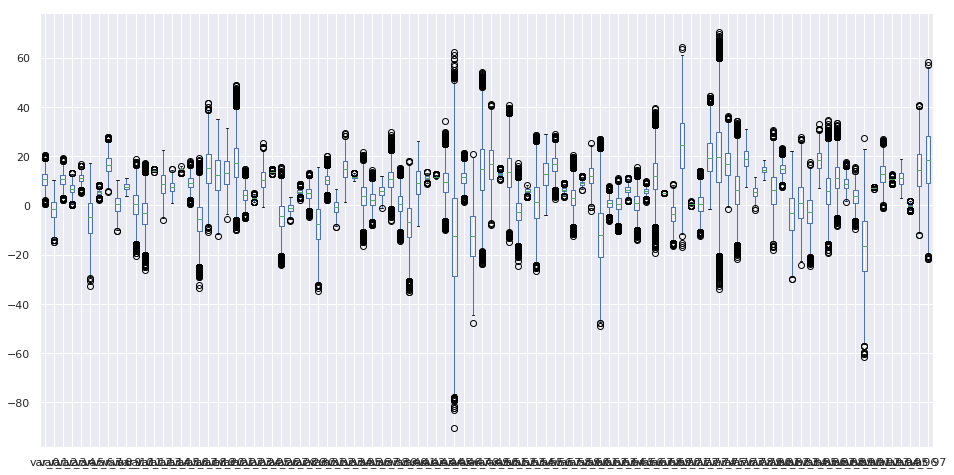

In [27]:

train.iloc[:, 2:100].plot(kind='box', figsize=[16,8])


# min = around -80
# max = around 70 ,75

Plot last 100 features.

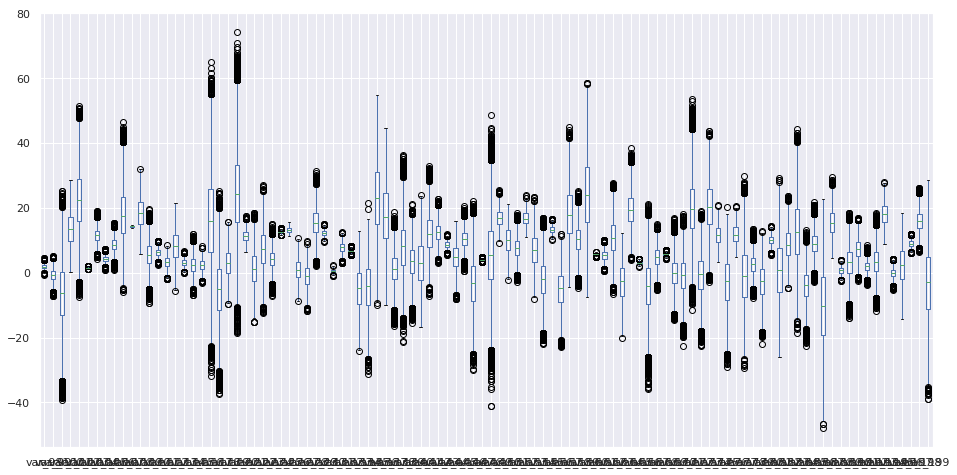

In [28]:

train.iloc[:, 100:].plot(kind='box', figsize=[16,8])
# min = around -45
#max = around 75

# Distribution of targets

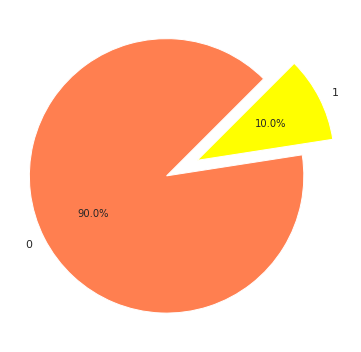

In [34]:

colors = ['coral','yellow']
plt.figure(figsize=(6,6))
plt.pie(train["target"].value_counts(), explode=(0, 0.25), labels= ["0", "1"], startangle=45, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.show()

# Adding New Features (Feature Engineering)

In [61]:
df = pd.DataFrame()
features = train.columns.values[2:201]
df['sum'] = train[features].sum(axis=1)  
df['min'] = train[features].min(axis=1)
df['max'] = train[features].max(axis=1)
df['mean'] = train[features].mean(axis=1)
df['std'] = train[features].std(axis=1)
df['skew'] = train[features].skew(axis=1)
df['kurt'] = train[features].kurtosis(axis=1)
df['med'] = train[features].median(axis=1)


# Spliting the dataset into training set and test set to find accuracy

In [62]:
df.columns

Index(['sum', 'min', 'max', 'mean', 'std', 'skew', 'kurt', 'med'], dtype='object')

In [63]:
train = pd.concat((train,df),axis=1)

X = all the columns of train without target and ID_code tuple                
        y = all only the target column of train

In [64]:
cols=["target","ID_code"]
X = train.drop(cols,axis=1)
y = train["target"]

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=1)

# Model Builing 

# Light GBM is a gradient boosting framework that uses tree based learning algorithm.

In [67]:
import lightgbm as lgb

parameter used :

max_depth: It describes the maximum depth of tree. This parameter is used to handle model overfitting.

num_leaves: number of leaves in full tree, default: 31

boosting_type : 'gbdt' traditional Gradient Boosting Decision Tree

learning_rate: This determines the impact of each tree on the final outcome. 
               GBM works by starting with an initial estimate which is updated using the output of each tree. 
               The learning parameter controls the magnitude of this change in the estimates. 
               Typical values: 0.1, 0.001, 0.003…
               
n_estimators :                

In [68]:
model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=63, max_depth=43, learning_rate=0.017, n_estimators=300)

# Fitting the model

In [69]:
model.fit(train_X,train_y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.017, max_depth=43,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=300, n_jobs=-1, num_leaves=63, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Predicting the model 

In [70]:
pred = model.predict(val_X)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

In [71]:
from sklearn.metrics import roc_auc_score

In [72]:
print(roc_auc_score(pred,val_y))

0.9218510712639577
